In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

num of talks at each category
views of talks at each category
views of title (
    how titles look 
    will title polarity/subjectivity influence views)
views at different time length
polarity/subjectivity of speech
future step (
    time seris of categories changes
    speaker status to views)

In [2]:
df = pd.read_csv('tedtalks.csv')

In [3]:
df.shape

(4499, 6)

In [4]:
np.sum(df.isnull())

categories      2
length          0
speaker         1
title           0
transcrpit    500
view_num        0
dtype: int64

In [5]:
df = df[['title','speaker','length','categories','view_num','transcrpit']]
df.sample(5)

,title,speaker,length,categories,view_num,transcrpit
2038,Hey science teachers -- make it fun,Tyler DeWitt,11:20,"TEDx,biology,children,education,science,psycho...",1845977,Let me tell you a story.Its my first year as a...
1236,Pay attention to penguins,Dee Boersma,15:09,"animals,global issues,mission blue,oceans,scie...",439820,"I want to talk about penguins today.But first,..."
1070,My wish: Let my photographs bear witness,James Nachtwey,21:56,"activism,culture,global issues,media,photograp...",1654910,As someone who has spent his entire career try...
4050,The disarming case to act right now on climate...,Greta Thunberg,11:12,"climate change,environment,sustainability,poli...",5063213,"When I was about eight years old,I first heard..."
2889,How the food you eat affects your brain,Mia Nacamulli,4:37,"health,brain,food,human body,public health,ani...",7333627,Your Brain on FoodIf you sucked all of the moi...


## Talk Categories

Text(0.5, 1.0, 'Top 20 Categories with most Talks')

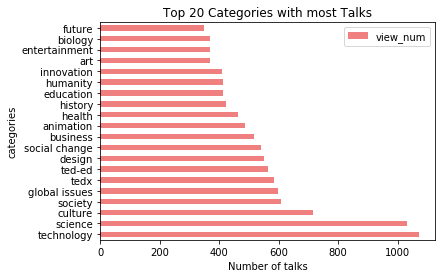

In [6]:
#category——num
# Convert all the string to lower cases
df['categories'] = df['categories'].str.lower()

X = (zip(df.categories.astype(str).str.split(','), df['view_num']))
Y = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), X))
a, b = zip(*sum(Y,[])) 
Z = pd.DataFrame({'categories':a,'view_num':b})
Z.groupby('categories').count().sort_values('view_num',ascending = False).head(20).plot(kind='barh', color='lightcoral')
plt.xlabel('Number of talks')
plt.title('Top 20 Categories with most Talks')

Text(0.5, 1.0, 'Histogram of Talk Views')

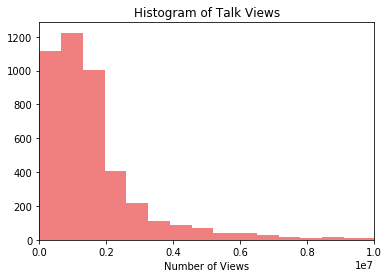

In [7]:
plt.hist(df['view_num'].dropna(), bins=100, color="lightcoral")
plt.xlim(0,10000000)
plt.xlabel('Number of Views')
plt.title('Histogram of Talk Views')

Text(0.5, 1.0, 'Number of Talk Views')

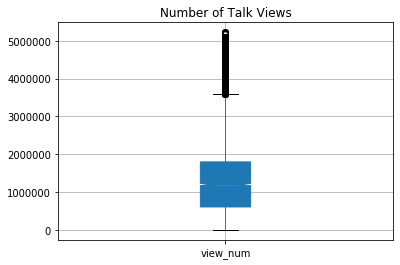

In [8]:
view_df = df[['view_num']]
view_df = view_df.loc[(view_df.view_num - view_df.view_num.mean()).abs()/view_df.view_num.std() < 1]
view_df.boxplot(column='view_num',patch_artist=True,notch=True)
plt.title('Number of Talk Views')

Text(0.5, 1.0, 'Top 20 Categories with most Average Views')

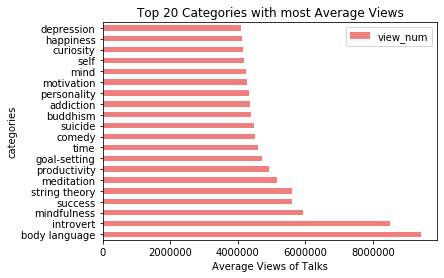

In [9]:
#category——view_num
Z.groupby('categories').mean().sort_values('view_num',ascending = False).head(20).plot(kind='barh', color='lightcoral')
plt.xlabel('Average Views of Talks')
plt.title('Top 20 Categories with most Average Views')

## How titles look like

In [10]:
from wordcloud import WordCloud,ImageColorGenerator

In [11]:
import nltk
from textblob import TextBlob

In [12]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400,)
# generate word cloud
wc.generate(' '.join(df['title']))

In [13]:
df_title = df.copy()
df_title['title'] = df_title['title'].apply(str).str.lower()
df_title['title'] = df_title['title'].apply(lambda x: re.sub('[^\w\s]', '', x))

from nltk.corpus import stopwords
stop = stopwords.words('english')+['make','take']

df_title['title'] = df_title['title'].apply(lambda text: ' '.join(word for word in text.split() if word not in stop))

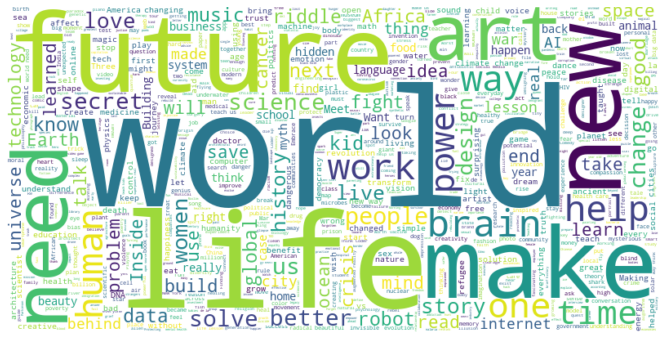

In [14]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top 20 Words in Title with most Views')

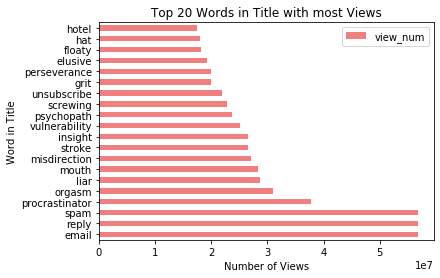

In [15]:
df_title = df.copy()
df_title['title'] = df_title['title'].apply(str).str.lower()
df_title['title'] = df_title['title'].apply(lambda x: re.sub('[^\w\s]', '', x))
df_title['title'] = df_title['title'].apply(lambda text: ','.join(word for word in text.split() if word not in stop))


A = (zip(df_title.title.astype(str).str.split(','), df['view_num']))
B = (map(lambda t:list(zip(t[0],[t[1]]*len(t[0]))), A))
x, y = zip(*sum(B,[]))  

C = pd.DataFrame({'title':x,'view_num':y})
C.groupby('title').mean().sort_values('view_num',ascending = False).head(20).plot(kind='barh', color='lightcoral')
plt.xlabel('Number of Views')
plt.ylabel('Word in Title')
plt.title('Top 20 Words in Title with most Views')

## title polarity/subjectivity

In [16]:
#title polarity and subjectivity
title_polarity = list(map(lambda s: TextBlob(s).polarity,df['title'].tolist()))
title_subjectivity = list(map(lambda s: TextBlob(s).subjectivity,df['title'].tolist()))

df['title_subjectivity'],df['title_polarity'] = title_subjectivity,title_polarity
df.head()

,title,speaker,length,categories,view_num,transcrpit,title_subjectivity,title_polarity
0,How I built a first aid kit for astronauts,Virginia Wotring,10:15,"science,health,space,health care,pharmaceutica...",25361,NaN,0.333333,0.25
1,Can you solve the sea monster riddle?,Daniel Finkel,4:55,"ted-ed,education,oceans,animation,math",637516,"According to legend, once every thousand years...",0.000000,0.00
2,"""You Have the Rite""",Marc Bamuthi Joseph,7:14,"poetry,race,spoken word,social change,society,...",1833533,Me and the boy wear the same shoe size.He want...,0.000000,0.00
3,A global initiative to end violence against ch...,Howard Taylor,11:02,"global issues,children,youth,activism,social c...",22837,[This talk contains mature content]Im often as...,0.000000,0.00
4,How we experience time and memory through art,Sarah Sze,13:51,"time,art,culture,materials,creativity,memory",202482,I want to start with a question.Where does an ...,0.000000,0.00


Text(0.5, 1.0, 'Subjectivity of Titles')

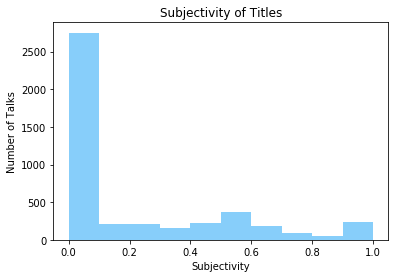

In [17]:
#  histogram of title_subjectivity
plt.hist(df['title_subjectivity'], color="lightskyblue")
plt.xlabel('Subjectivity')
plt.ylabel('Number of Talks')
plt.title('Subjectivity of Titles')

Text(0.5, 1.0, 'Title Subjectivity')

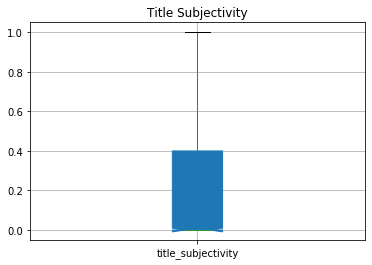

In [18]:
#  boxplot of title_subjectivity
df.boxplot(column='title_subjectivity',notch=True,patch_artist=True)
plt.title('Title Subjectivity')

Text(0, 0.5, 'Number of views')

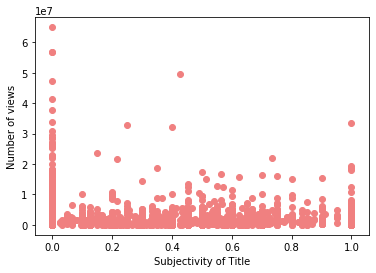

In [19]:
#  scatter plot of title_subjectivity vs view
plt.scatter(df['title_subjectivity'], df['view_num'],color="lightcoral")
plt.xlabel('Subjectivity of Title')
plt.ylabel('Number of views')

Text(0.5, 1.0, 'Title Subjectivity')

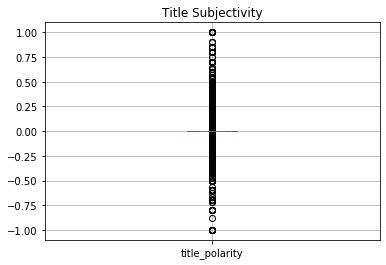

In [20]:
#  boxplot of title_polarity
df.boxplot(column='title_polarity',notch=True,patch_artist=True)
plt.title('Title Subjectivity')

Text(0.5, 1.0, 'Polarity of Titles')

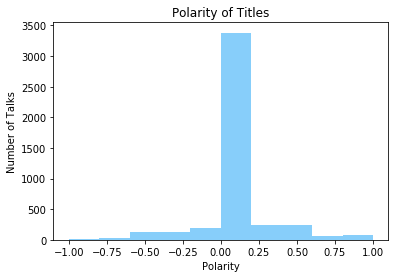

In [21]:
#  histogram of title_polarity 
plt.hist(df['title_polarity'], color="lightskyblue")
plt.xlabel('Polarity')
plt.ylabel('Number of Talks')
plt.title('Polarity of Titles')

Text(0.5, 1.0, 'Views vs Title Polarity')

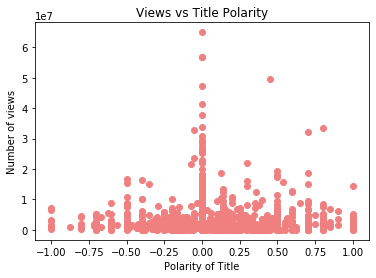

In [22]:
#  scatter plot of title_polarity vs view
plt.scatter(df['title_polarity'], df['view_num'],color="lightcoral")
plt.xlabel('Polarity of Title')
plt.ylabel('Number of views')
plt.title('Views vs Title Polarity')

## scatter plot of time vs view number


In [23]:
#change time length to second
df_ = df.copy()
df_.loc[df_['length'].str.contains('h'), 'hour'] = df_['length'].str.split('h').str[0]
df_.loc[df_['length'].str.contains('h'), 'minute'] = df_['length'].str.split('h').str[1].str.replace('m', '')
df_.loc[df_['length'].str.contains(':'), 'minute'] = df_['length'].str.split(':').str[0]
df_.loc[df_['length'].str.contains(':'), 'second'] = df_['length'].str.split(':').str[1]
df_ = df_.fillna({'hour': 0, 'minute': 0, 'second': 0})
df_['length_in_second'] = df_['hour'].astype(int)*3600 + df_['minute'].astype(int)*60+df_['second'].astype(int)
df_.drop(['hour','minute','second'],axis=1).head()

,title,speaker,length,categories,view_num,transcrpit,title_subjectivity,title_polarity,length_in_second
0,How I built a first aid kit for astronauts,Virginia Wotring,10:15,"science,health,space,health care,pharmaceutica...",25361,NaN,0.333333,0.25,615
1,Can you solve the sea monster riddle?,Daniel Finkel,4:55,"ted-ed,education,oceans,animation,math",637516,"According to legend, once every thousand years...",0.000000,0.00,295
2,"""You Have the Rite""",Marc Bamuthi Joseph,7:14,"poetry,race,spoken word,social change,society,...",1833533,Me and the boy wear the same shoe size.He want...,0.000000,0.00,434
3,A global initiative to end violence against ch...,Howard Taylor,11:02,"global issues,children,youth,activism,social c...",22837,[This talk contains mature content]Im often as...,0.000000,0.00,662
4,How we experience time and memory through art,Sarah Sze,13:51,"time,art,culture,materials,creativity,memory",202482,I want to start with a question.Where does an ...,0.000000,0.00,831


Text(0.5, 1.0, 'Boxplot of Talk Length in Seconds')

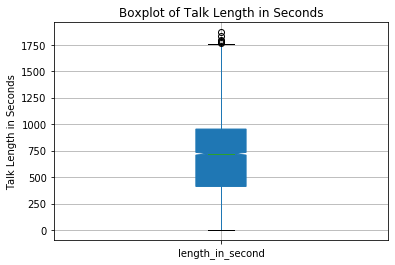

In [24]:
df_len = df_[['length_in_second']]
df_len = df_len.loc[(df_len.length_in_second - df_len.length_in_second.mean()).abs()/df_len.length_in_second.std() < 3]

df_len.boxplot(column='length_in_second',notch=True,patch_artist=True)
plt.ylabel('Talk Length in Seconds')
plt.title('Boxplot of Talk Length in Seconds')

Text(0.5, 1.0, 'Number of View vs Talk Length')

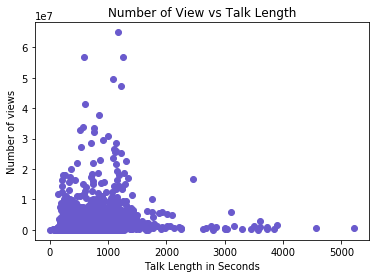

In [25]:
plt.scatter(df_['length_in_second'], df_['view_num'],color="slateblue")
plt.xlabel('Talk Length in Seconds')
plt.ylabel('Number of views')
plt.title('Number of View vs Talk Length')

## Content 

In [26]:
df_trn = df.dropna(subset=['transcrpit']).drop(['title_subjectivity','title_polarity'], axis=1)
df_trn

,title,speaker,length,categories,view_num,transcrpit
1,Can you solve the sea monster riddle?,Daniel Finkel,4:55,"ted-ed,education,oceans,animation,math",637516,"According to legend, once every thousand years..."
2,"""You Have the Rite""",Marc Bamuthi Joseph,7:14,"poetry,race,spoken word,social change,society,...",1833533,Me and the boy wear the same shoe size.He want...
3,A global initiative to end violence against ch...,Howard Taylor,11:02,"global issues,children,youth,activism,social c...",22837,[This talk contains mature content]Im often as...
4,How we experience time and memory through art,Sarah Sze,13:51,"time,art,culture,materials,creativity,memory",202482,I want to start with a question.Where does an ...
5,How to 3D print human tissue,Taneka Jones,4:52,"ted-ed,animation,medicine,medical research,edu...",183586,There are currently hundreds of thousands of p...
...,...,...,...,...,...,...
4494,How a dragonfly's brain is designed to kill,Greg Gage,5:17,"science,animals,insects,neuroscience",1139559,Greg Gage: If I asked youto think of a ferocio...
4495,How sound can hack your memory while you sleep,Greg Gage,4:07,"science,neuroscience,memory,sleep",842426,Greg Gage: Who wouldnt loveacing a geography e...
4496,How you can make a fruit fly eat veggies,Greg Gage,4:29,"science,neuroscience,insects,animals,food",354265,Greg Gage: Its an age-oldpursuit of all parent...
4497,This computer is learning to read your mind,Greg Gage,5:51,"science,brain,neuroscience,electricity",349061,Greg Gage: Mind-reading.Youve seen this in sci...


In [27]:
#transcrpit polarity and subjectivity
transcrpit_polarity = list(map(lambda s: TextBlob(s).polarity,df_trn['transcrpit'].tolist()))
transcrpit_subjectivity = list(map(lambda s: TextBlob(s).subjectivity,df_trn['transcrpit'].tolist()))

df_trn['transcrpit_subjectivity'],df_trn['transcrpit_polarity'] = transcrpit_subjectivity,transcrpit_polarity
df_trn.head()

,title,speaker,length,categories,view_num,transcrpit,transcrpit_subjectivity,transcrpit_polarity
1,Can you solve the sea monster riddle?,Daniel Finkel,4:55,"ted-ed,education,oceans,animation,math",637516,"According to legend, once every thousand years...",0.410913,0.107132
2,"""You Have the Rite""",Marc Bamuthi Joseph,7:14,"poetry,race,spoken word,social change,society,...",1833533,Me and the boy wear the same shoe size.He want...,0.431454,0.055273
3,A global initiative to end violence against ch...,Howard Taylor,11:02,"global issues,children,youth,activism,social c...",22837,[This talk contains mature content]Im often as...,0.413330,0.163815
4,How we experience time and memory through art,Sarah Sze,13:51,"time,art,culture,materials,creativity,memory",202482,I want to start with a question.Where does an ...,0.472051,0.187273
5,How to 3D print human tissue,Taneka Jones,4:52,"ted-ed,animation,medicine,medical research,edu...",183586,There are currently hundreds of thousands of p...,0.468112,0.132281


Text(0.5, 1.0, 'Histogram of Talk Subjectivity')

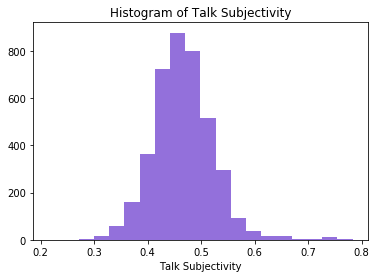

In [28]:
# histogram of transcrpit_polarity
plt.hist(df_trn['transcrpit_subjectivity'].dropna(), bins=20, color="mediumpurple")
plt.xlabel('Talk Subjectivity')
plt.title('Histogram of Talk Subjectivity')

Text(0.5, 1.0, 'Histogram of Talk Polarity')

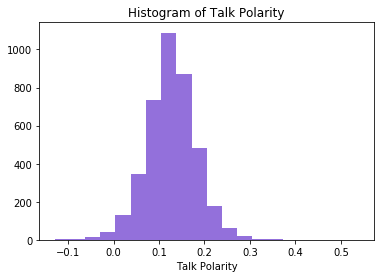

In [29]:
# histogram of transcrpit_polarity
plt.hist(df_trn['transcrpit_polarity'].dropna(), bins=20, color="mediumpurple")
plt.xlabel('Talk Polarity')
plt.title('Histogram of Talk Polarity')